<font size=5 > <p style="color:purple"> Which Factors Influence the Price of Health Insurance?

<font size='2'>Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

* **age:** age of primary beneficiary

* **sex:** insurance contractor gender, female, male

* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

<font size=5><p style="color:purple"> EDA and Visualizations 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
df.shape

(1338, 7)

In [55]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [57]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<font size='2' font>We have 0 missing values which is very good.
Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors 

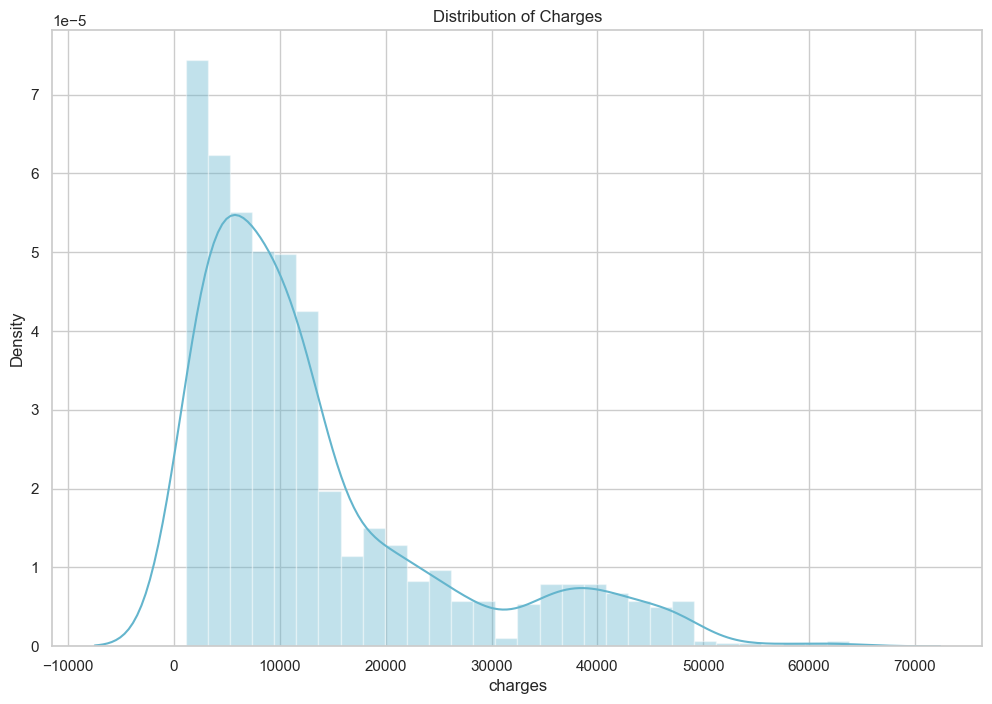

In [58]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges');

<font size='2' font>This distribution is right-skewed. To make it closer to normal we can apply natural log 

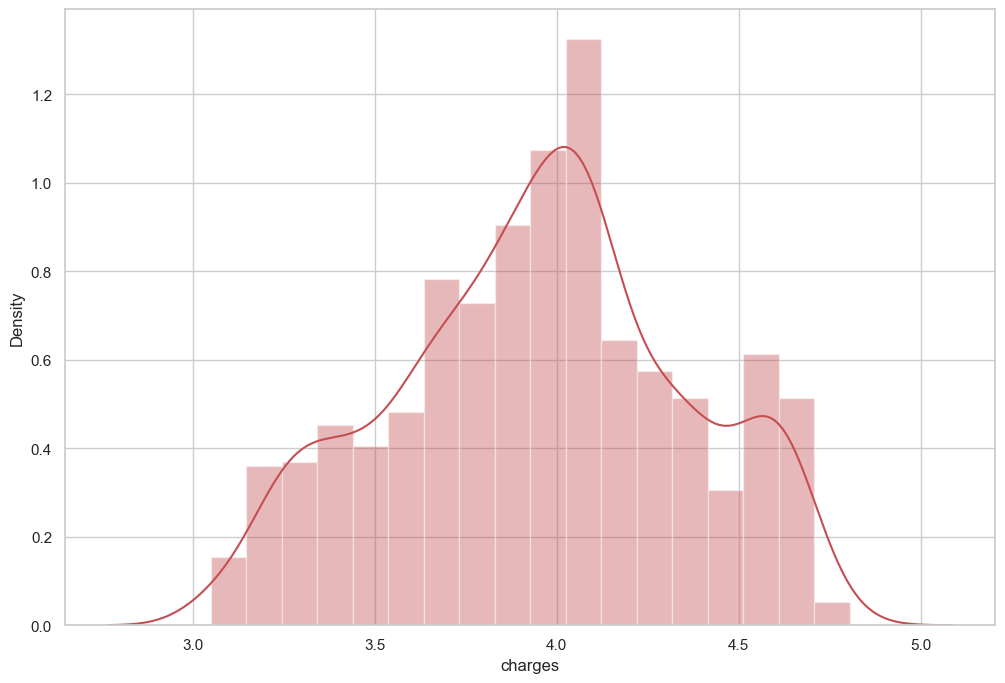

In [59]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' );

<font size=2> Now let's look at the charges by region

In [60]:
# charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
# f, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax = sns.barplot(charges.head(), charges.head().index, palette='Blues');

<font size='2' font>So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region 

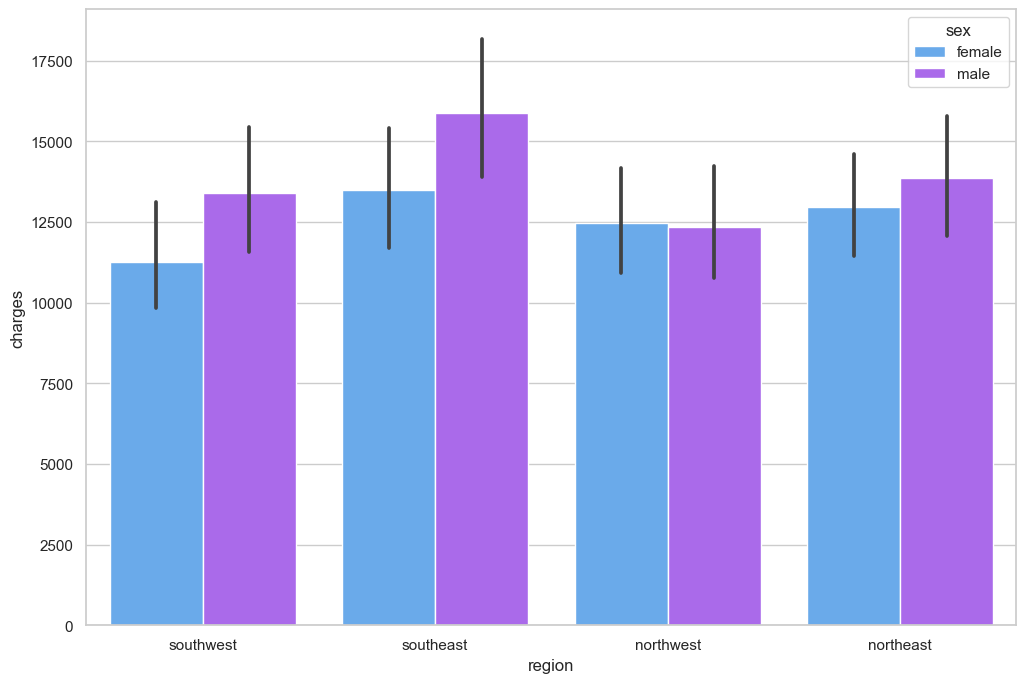

In [61]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool');

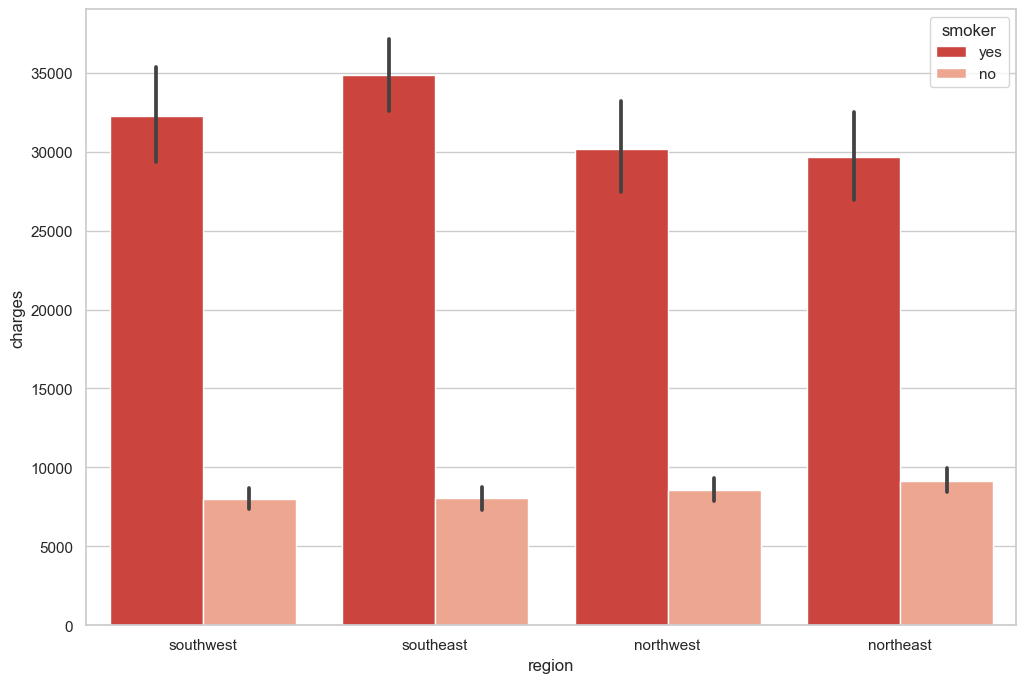

In [62]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

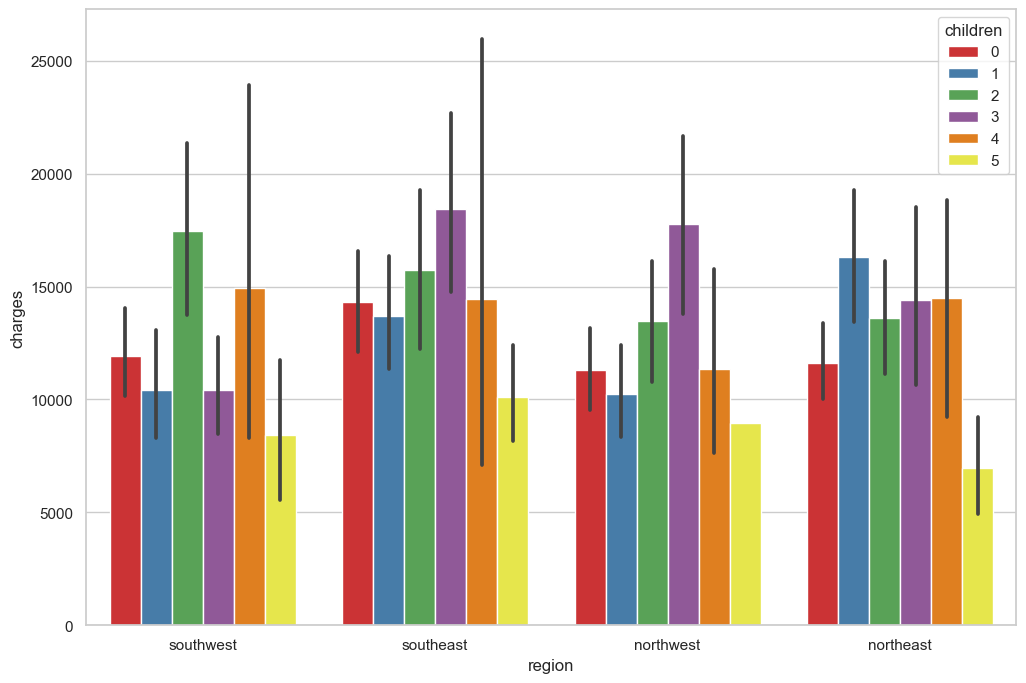

In [63]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

<font size='2' font>As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

<font size='2' font>Now let's analyze the medical charges by age, bmi and children according to the smoking factor 

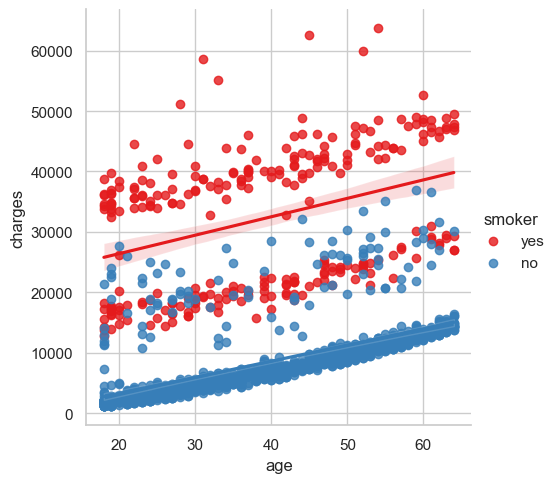

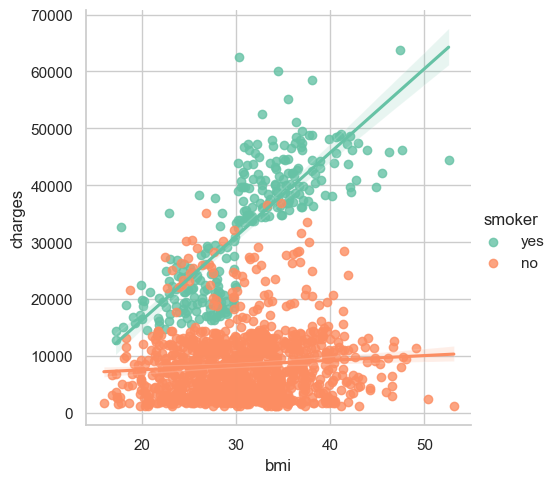

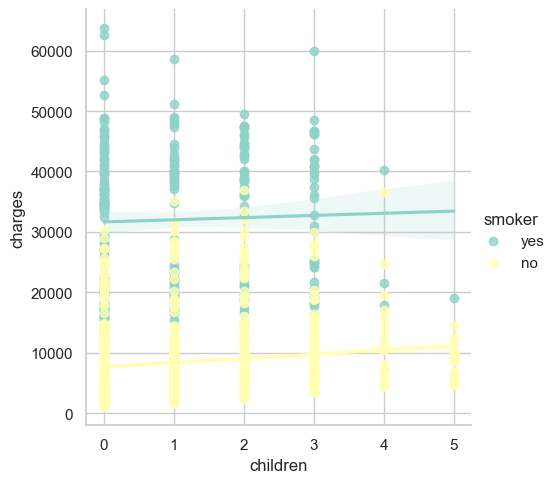

In [64]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

<font size='2' font>Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

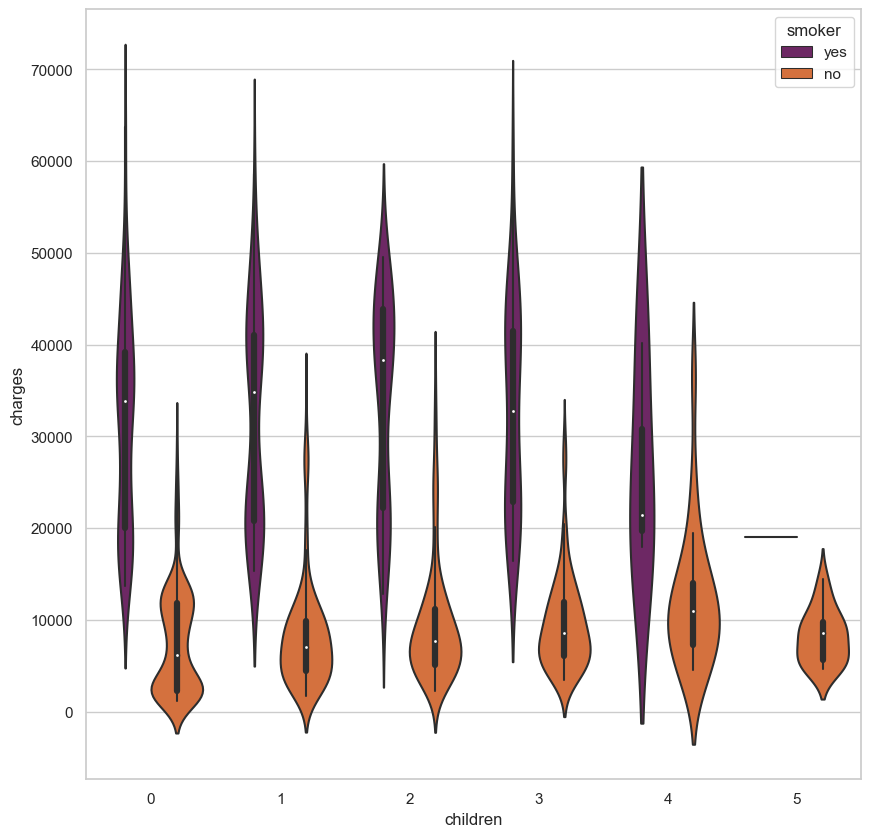

In [65]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [66]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [67]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

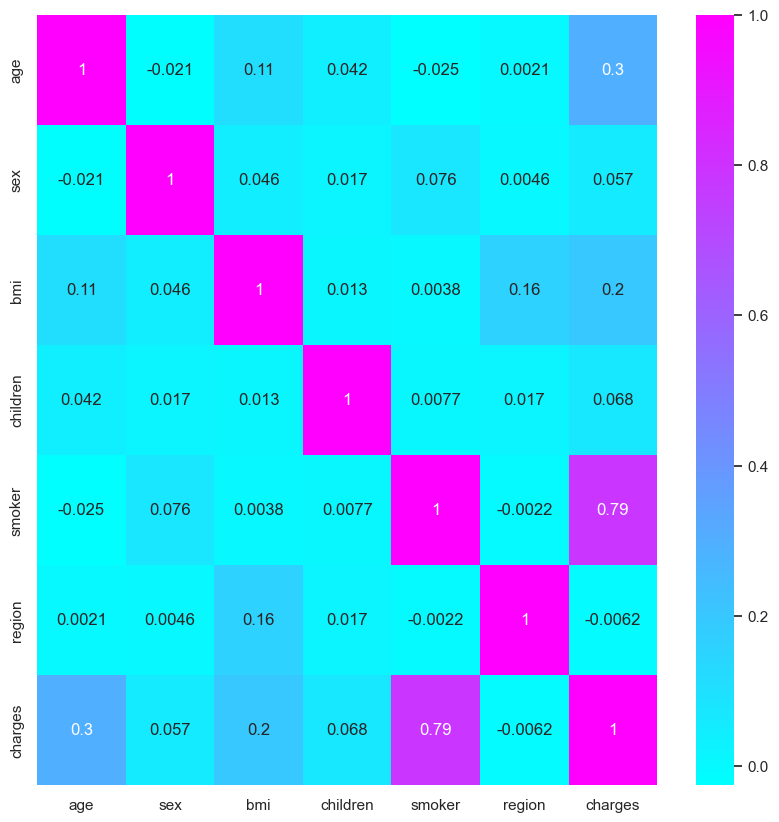

In [68]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

<font size='2' font>No correlation, except with the smoking 

<font size=5><p style="color:purple"> Linear Regression

In [69]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.3, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11827.733141795696
[  256.5772619    -49.39232379   329.02381564   479.08499828
 23400.28378787  -276.31576201]
0.7911113876316933


<font size='2' font>The result we got is good enough, but we can try to improve it a bit by reducing unimportant features later

<font size=5><p style="color:purple">Ridge Regression 

In [70]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11804.599548071179
[  256.44953137   -45.26718419   328.90500957   479.2698532
 23322.57512911  -276.88143086]
0.7908860657576137


<font size=5><p style="color:purple"> Lasso Regression

In [71]:
# from sklearn.linear_model import Lasso
# Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
#               tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
# Lasso.fit(x_train, y_train)
# print(Lasso.intercept_)
# print(Lasso.coef_)
# print(Lasso.score(x_test, y_test))

<font size=5><p style="color:purple"> Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(x_train_pred, y_train),
       metrics.r2_score(x_test_pred, y_test)))

InvalidParameterError: The 'criterion' parameter of RandomForestRegressor must be a str among {'friedman_mse', 'absolute_error', 'squared_error', 'poisson'}. Got 'mse' instead.

In [73]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

NameError: name 'x_train_pred' is not defined

<Figure size 800x600 with 0 Axes>

Feature importance ranking


1.smoker(0.595302)
2.bmi(0.216178)
3.age(0.142438)
4.children(0.022004)
5.region(0.016854)
6.sex(0.007224)


<BarContainer object of 6 artists>

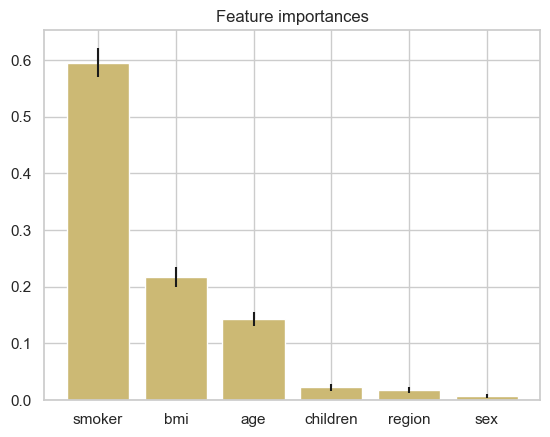

In [ ]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<font size=5><p style="color:purple"> Polynomial Regression

In [75]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705252867
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345225


In [76]:
x

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,3,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


In [77]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

<font size='2' font >Awesome! :)

In [78]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776517
Mean Squared Error: 18895160.098780446
Root Mean Squared Error: 4346.856346692452


In [79]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


<font size=2> **Conclusion:** like we previously noticed **smoking** is the greatest factor that affects medical cost charges, then it's **bmi** and **age**. **Polynomial Regression** turned out to be the best model

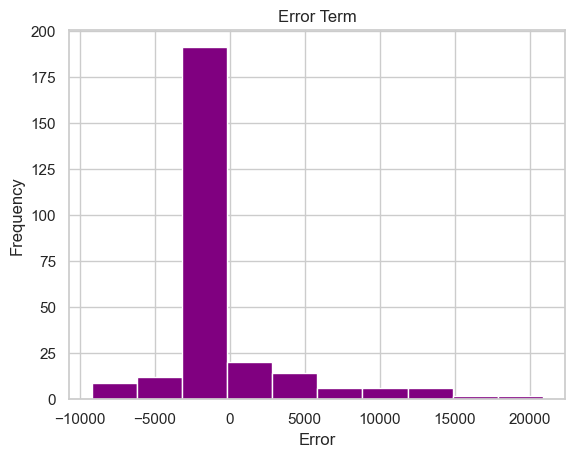

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the actual and predicted values into a DataFrame
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Calculate the difference between the actual and predicted values
df['Error'] = df['Actual'] - df['Predicted']

# Plot a histogram of the error term
plt.hist(df['Error'], color='purple')
plt.title('Error Term')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


<Figure size 640x480 with 0 Axes>

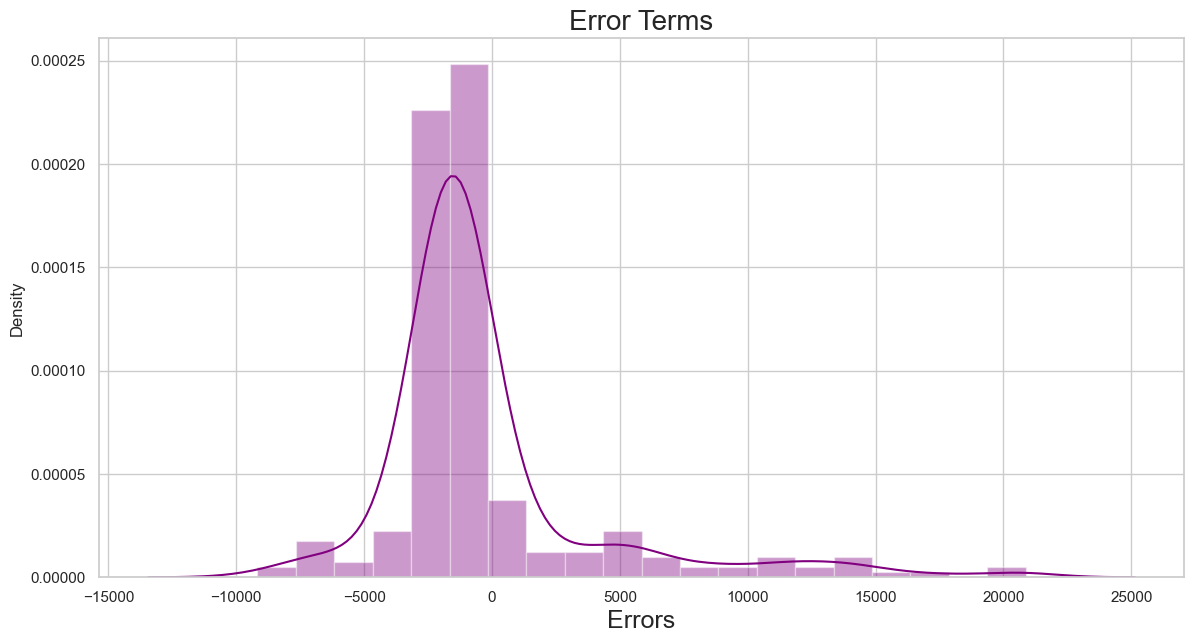

In [81]:
# Plt the histogram
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_test - y_test_pred), bins=20, color='purple')
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()